In [50]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [51]:
iris = pd.read_csv(r"/Users/mehmetkorkmaz/Applications/venv/iris.csv")

In [52]:
iris.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [53]:
x = iris.drop('Species', axis=1)
y = iris['Species']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

In [54]:
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(trainX, trainY)
y_pred = log_reg.predict(testX)

In [55]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 0.98
Error rate: 0.02


In [56]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(clf, trainX, trainY, cv=5)
scores

array([1.        , 1.        , 1.        , 1.        , 0.95238095])

In [57]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.04)


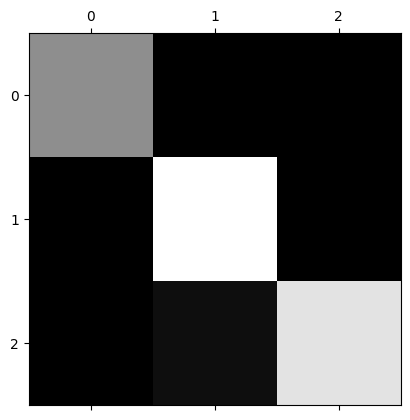

[[10  0  0]
 [ 0 18  0]
 [ 0  1 16]]


In [58]:
confusion_matrix = confusion_matrix(testY, y_pred)
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()
print(confusion_matrix)

In [49]:
print(confusion_matrix)

[[16  0  0]
 [ 0 15  0]
 [ 0  0 14]]
